In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os
print("Current Dir ",os.getcwd())
curr_dir=os.getcwd()
# connecting the current directory with thw datasets
train_path=os.path.join(curr_dir,"datasets","Train")
test_path=os.path.join(curr_dir,"datasets","Test")
valid_path=os.path.join(curr_dir,"datasets","Valid")


Current Dir  c:\Users\DEEPALI\Desktop\Potato Leaf Disease Detection


In [3]:
# formatting the training set 
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path, #path to train folder where all images are present
    labels="inferred",
    label_mode="categorical", # input data in categorical order based on the subfolder inside the train folder. naming is like [1,0,0], [0,1,0] and [0,0,1]
    color_mode= "rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation = "bilinear", #use for resizing images and it is better than bicubic
)

Found 900 files belonging to 3 classes.


In [4]:
#gives all the categories present in training set
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical", # catgorises all the images into 3 categories
    color_mode= "rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation = "bilinear", #used for resizing the images
)

Found 300 files belonging to 3 classes.


In [6]:
# Now creating convolution neural networking using keras model sequential
cnn = tf.keras.models.Sequential()

# first layer in keras
#Conv2D is a convolution layer is used to apply filters or specify features of the image 
# different filters represent different features are learnt by each layer
# input_shape is for photo size
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3, padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))           

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3, padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3, padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#here we can also add only onelayer as well for simplicity

# dropout removes all the unnecessary neurons that are not adding value to the model
cnn.add(tf.keras.layers.Dropout(0.25))

# Now the neural network layers
# flatten converts 3d images to 1d images
cnn.add(tf.keras.layers.Flatten())

# Dense is use to add neurons. So here 1500 neurons are added
# activation='relu' converts all the negative numbers to 0. Eg. -3 change to 0.
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

# At last only three neurons will remain which will categorise the given image. Softmax calculate approximate probablity values after analysing the leaf according to healthy, late_blight or early_blight. Out of the calculated 3 values max value will tell the state of the leaf. Ex: L=0.2, H=0.73, E=0.123 so the given leaf is Healthy.
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))
# here 3 units represent 3 neurons

c:\Users\DEEPALI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
training_history=cnn.fit(x=training_set,validation_data=validation_set, epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 301s 10s/step - accuracy: 0.3625 - loss: 1.9426 - val_accuracy: 0.6600 - val_loss: 0.7975
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 254s 7s/step - accuracy: 0.6725 - loss: 0.7502 - val_accuracy: 0.7767 - val_loss: 0.5182
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 275s 10s/step - accuracy: 0.7682 - loss: 0.5130 - val_accuracy: 0.8633 - val_loss: 0.3532
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 346s 10s/step - accuracy: 0.8143 - loss: 0.4487 - val_accuracy: 0.8967 - val_loss: 0.2736
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 275s 9s/step - accuracy: 0.8965 - loss: 0.2556 - val_accuracy: 0.9167 - val_loss: 0.1861
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 233s 8s/step - accuracy: 0.9040 - loss: 0.2401 - val_accuracy: 0.9133 - val_loss: 0.2007
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 182s 6s/step - accuracy: 0.8860 - loss: 0.2445 - val_accuracy: 0.9200 - val_loss: 0.1729
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 173s 6s/step - accuracy: 0.9497 - loss: 0.1368 - val_accuracy: 0.8967 

In [10]:
train_loss, train_acc=cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9511 - loss: 0.1259
Training accuracy: 0.9588888883590698


In [11]:
val_loss, val_acc=cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9421 - loss: 0.2039
Validation accuracy: 0.9333333373069763


In [14]:
training_history.history

{'accuracy': [0.41333332657814026,
  0.7011111378669739,
  0.7877777814865112,
  0.8322222232818604,
  0.9077777862548828,
  0.9188888669013977,
  0.9011111259460449,
  0.9366666674613953,
  0.9433333277702332,
  0.9477777481079102],
 'loss': [1.3910584449768066,
  0.6584004163742065,
  0.4726124107837677,
  0.4114780128002167,
  0.2328905165195465,
  0.2152935415506363,
  0.232511505484581,
  0.16873683035373688,
  0.15165133774280548,
  0.14085176587104797],
 'val_accuracy': [0.6600000262260437,
  0.7766666412353516,
  0.8633333444595337,
  0.8966666460037231,
  0.9166666865348816,
  0.9133333563804626,
  0.9200000166893005,
  0.8966666460037231,
  0.8866666555404663,
  0.9333333373069763],
 'val_loss': [0.7974660992622375,
  0.5182241201400757,
  0.3531561493873596,
  0.2735545039176941,
  0.18610858917236328,
  0.20066890120506287,
  0.17289692163467407,
  0.28444021940231323,
  0.37120693922042847,
  0.19451019167900085]}

In [12]:
cnn.save('trained_plant_disease_model.keras')

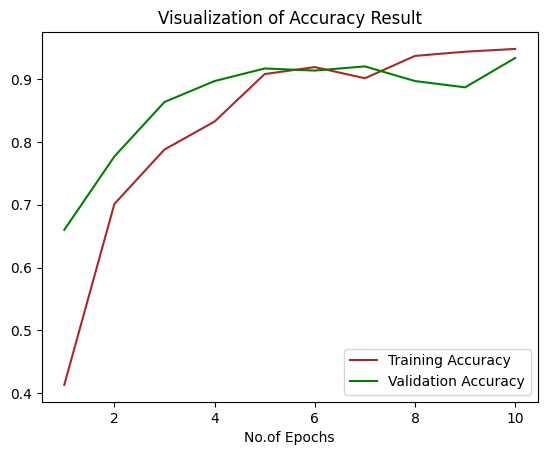

In [13]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No.of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()